<a href="https://colab.research.google.com/github/Sathwika2202/NLP/blob/main/ASSIGNMENT_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [16]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
df = pd.read_csv("Tweets.csv")
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
df.columns


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [19]:
tweets = df['text']
labels = df['airline_sentiment']


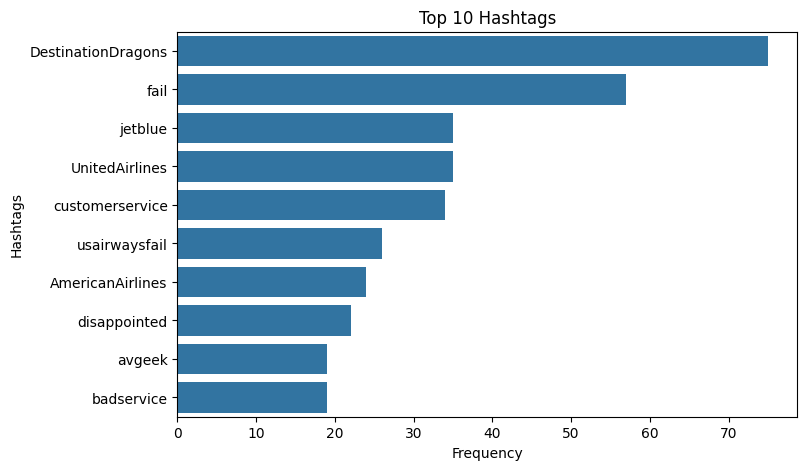

In [20]:
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

hashtags = tweets.apply(extract_hashtags)
hashtags_flat = [tag for sublist in hashtags for tag in sublist]

hashtag_freq = pd.Series(hashtags_flat).value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=hashtag_freq.values, y=hashtag_freq.index)
plt.title("Top 10 Hashtags")
plt.xlabel("Frequency")
plt.ylabel("Hashtags")
plt.show()


In [21]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)   # URLs
    text = re.sub(r"@\w+", "", text)             # Mentions
    text = re.sub(r"#\w+", "", text)             # Hashtags
    text = re.sub(r"[^a-z\s]", "", text)         # Punctuation & numbers
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_tweet'] = tweets.apply(clean_text)
df[['text', 'clean_tweet']].head()


,text,clean_tweet
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [23]:
nltk.download('punkt_tab')
df['tokens'] = df['clean_tweet'].apply(word_tokenize)
df[['clean_tweet', 'tokens']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,clean_tweet,tokens
0,what said,"[what, said]"
1,plus youve added commercials to the experience...,"[plus, youve, added, commercials, to, the, exp..."
2,i didnt today must mean i need to take another...,"[i, didnt, today, must, mean, i, need, to, tak..."
3,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, obnoxious..."
4,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]"


In [24]:
stop_words = set(stopwords.words('english'))

df['tokens_no_stopwords'] = df['tokens'].apply(
    lambda words: [w for w in words if w not in stop_words]
)

df[['tokens', 'tokens_no_stopwords']].head()


,tokens,tokens_no_stopwords
0,"[what, said]",[said]
1,"[plus, youve, added, commercials, to, the, exp...","[plus, youve, added, commercials, experience, ..."
2,"[i, didnt, today, must, mean, i, need, to, tak...","[didnt, today, must, mean, need, take, another..."
3,"[its, really, aggressive, to, blast, obnoxious...","[really, aggressive, blast, obnoxious, enterta..."
4,"[and, its, a, really, big, bad, thing, about, it]","[really, big, bad, thing]"


In [25]:
lemmatizer = WordNetLemmatizer()

df['lemmatized_tokens'] = df['tokens_no_stopwords'].apply(
    lambda words: [lemmatizer.lemmatize(w) for w in words]
)

df[['tokens_no_stopwords', 'lemmatized_tokens']].head()


,tokens_no_stopwords,lemmatized_tokens
0,[said],[said]
1,"[plus, youve, added, commercials, experience, ...","[plus, youve, added, commercial, experience, t..."
2,"[didnt, today, must, mean, need, take, another...","[didnt, today, must, mean, need, take, another..."
3,"[really, aggressive, blast, obnoxious, enterta...","[really, aggressive, blast, obnoxious, enterta..."
4,"[really, big, bad, thing]","[really, big, bad, thing]"


In [26]:
df['processed_tweet'] = df['lemmatized_tokens'].apply(lambda x: " ".join(x))

final_df = df[['processed_tweet', 'airline_sentiment']]
final_df.head()


,processed_tweet,airline_sentiment
0,said,neutral
1,plus youve added commercial experience tacky,positive
2,didnt today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative


In [27]:
negative_tweets = df[df['airline_sentiment'] == 'negative']


In [28]:
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

negative_hashtags = negative_tweets['text'].apply(extract_hashtags)
negative_hashtags_flat = [tag for sublist in negative_hashtags for tag in sublist]


In [29]:
negative_hashtag_freq = pd.Series(negative_hashtags_flat).value_counts().head(10)
negative_hashtag_freq


,count
fail,57
UnitedAirlines,29
jetblue,26
customerservice,26
usairwaysfail,24
disappointed,21
AmericanAirlines,20
badservice,19
neveragain,18
frustrated,15


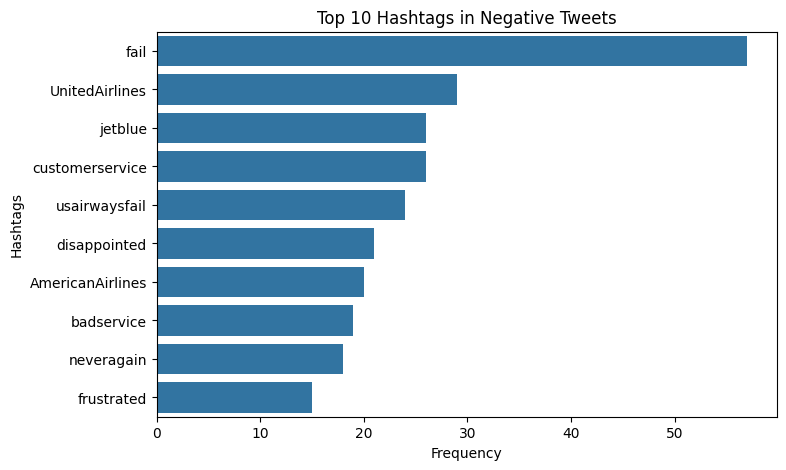

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=negative_hashtag_freq.values,
    y=negative_hashtag_freq.index
)

plt.title("Top 10 Hashtags in Negative Tweets")
plt.xlabel("Frequency")
plt.ylabel("Hashtags")
plt.show()
